# Exercise 2. Data analysis and plotting

## Setup
- Link to Colab notebook: [here](https://colab.research.google.com/drive/1B-mMiSrklHBGptPGs1_PQ-lE8yg778fS?usp=sharing)
- upload the `grape_img_info_w_file.csv` file to Colab to begin

Load the file

In [3]:
import pandas as pd
df = pd.read_csv('grape_img_info_w_file.csv')

## Plotting

Plot age distribution

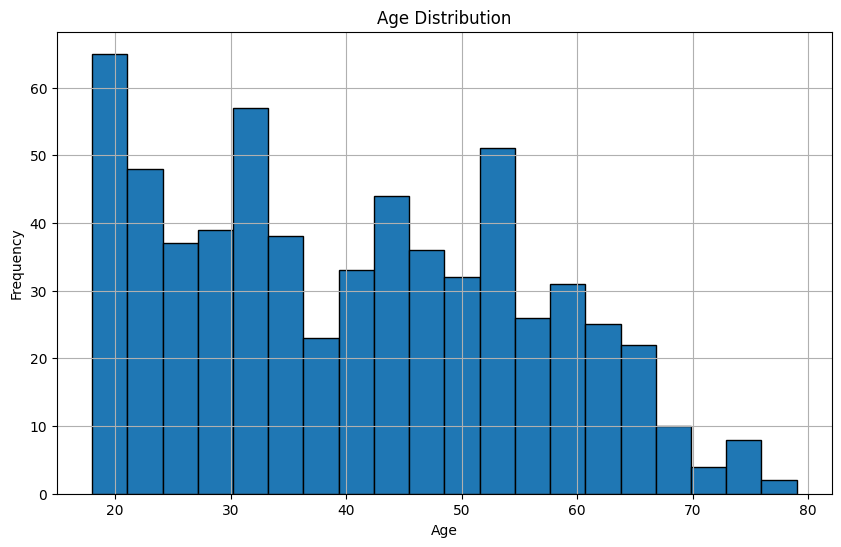

In [4]:
import matplotlib.pyplot as plt

# Convert Age column to numeric in case of any parsing issues
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop any rows with NaN ages
age_data = df['Age'].dropna()

# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Stratify age distribution by gender

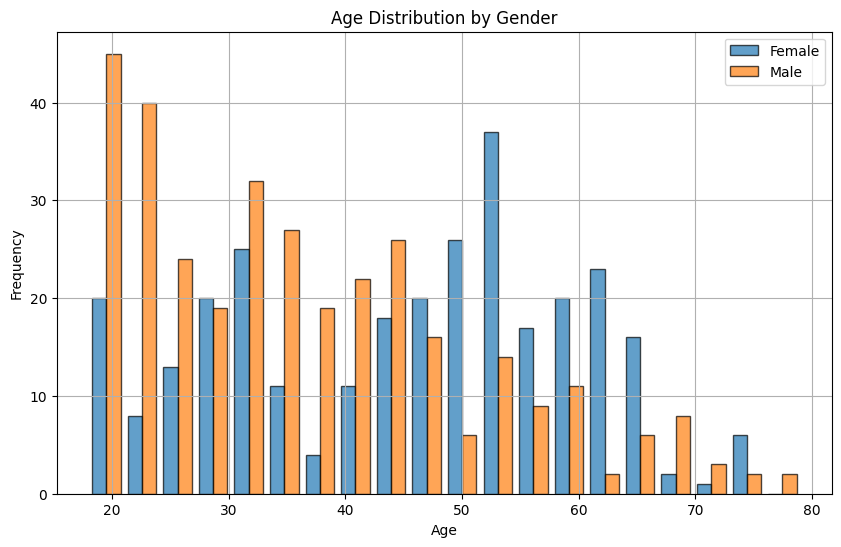

In [5]:
# Separate the age data by gender
male_ages = df[df['Gender'] == 'M']['Age'].dropna()
female_ages = df[df['Gender'] == 'F']['Age'].dropna()

# Plot age distribution by gender
plt.figure(figsize=(10, 6))
plt.hist([female_ages, male_ages], bins=20, label=['Female', 'Male'], edgecolor='black', alpha=0.7)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Chage appearance of the stratified age distribution plots

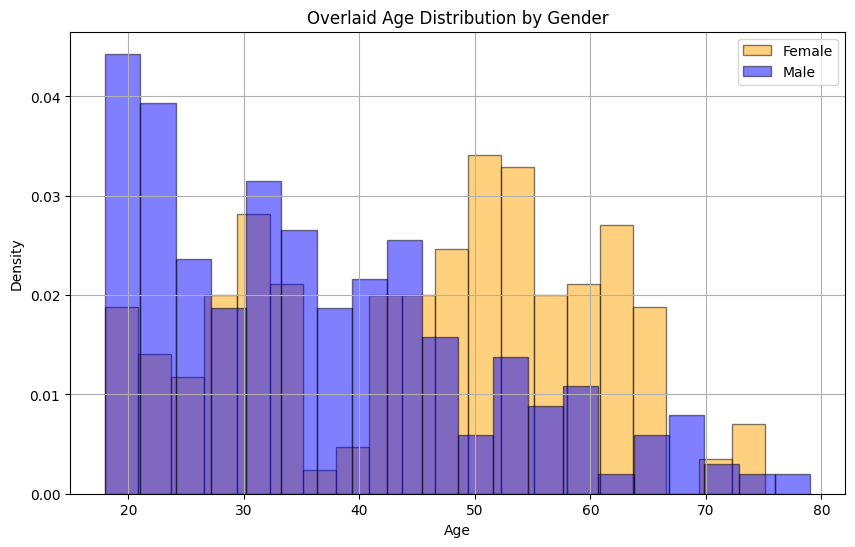

In [6]:
# Plot overlaid age distribution histograms for each gender
plt.figure(figsize=(10, 6))
plt.hist(female_ages, bins=20, density=True, alpha=0.5, label='Female', color='orange', edgecolor='black')
plt.hist(male_ages, bins=20, density=True, alpha=0.5, label='Male', color='blue', edgecolor='black')
plt.title('Overlaid Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## Statistical analysis

Run a t-test to assess differences in IOP between male and female patients

In [7]:
# Re-import libraries after reset
from scipy.stats import ttest_ind

# Convert IOP column to numeric
df['IOP'] = pd.to_numeric(df['IOP'], errors='coerce')

# Drop NaNs and separate IOP by gender
iop_male = df[df['Gender'] == 'M']['IOP'].dropna()
iop_female = df[df['Gender'] == 'F']['IOP'].dropna()

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(iop_female, iop_male, equal_var=False)

t_stat, p_value

(np.float64(-0.5719896871993858), np.float64(0.5675352899442934))

## Train model

Train a linear regression model to predict IOP from age and gender. Use 5-fold cross validation and MAE and R2 as metrics

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Prepare the data
df = df[['IOP', 'Age', 'Gender']].dropna()

# Encode gender as numeric
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Female=0, Male=1

X = df[['Age', 'Gender']]
y = df['IOP']

# Initialize model
model = LinearRegression()

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate with mean absolute error and R²
mae_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(mean_absolute_error))
r2_scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(r2_score))

mae_mean = np.mean(mae_scores)
r2_mean = np.mean(r2_scores)

mae_mean, r2_mean

(np.float64(3.4318211406419117), np.float64(0.004906179052577997))